In [59]:
import pandas as pd
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


# Grad Cam

## ResNet50

#### Noise combined scale 0.5

In [60]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,-0.724340,-0.985022,1.906070e+00,0.824836,-0.664228
1,0.411479,0.452630,1.947398e+00,0.825674,0.273409
2,-0.496771,-0.716978,1.194318e+00,0.894950,-0.521399
3,0.421832,-0.374127,1.473413e-20,0.879923,0.444672
4,1.033528,1.409982,5.170706e-16,0.933574,0.765039


In [61]:
df.mean()

NSS    0.813316
IG     0.598770
MSE    0.189123
SIM    0.877581
CC     0.650139
dtype: float64

<AxesSubplot: >

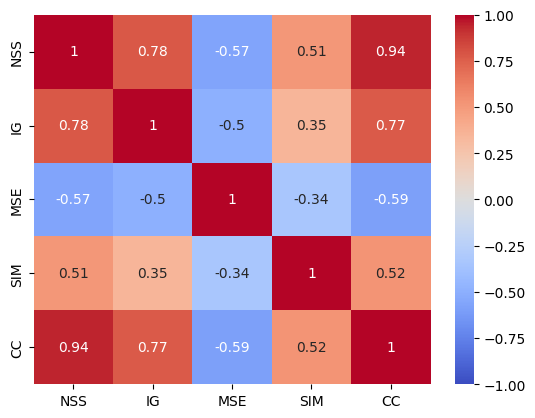

In [62]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 1

In [63]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,-0.614079,-0.301913,1.999999e+00,0.831194,-0.555921
1,0.177776,0.332155,1.965328e+00,0.847736,0.106107
2,-0.530375,-0.787697,1.999957e+00,0.875737,-0.541056
3,0.424909,-0.234851,1.439420e-19,0.874821,0.362238
4,0.698576,1.074644,3.159412e-13,0.924884,0.403408


In [64]:
df.mean()

NSS    0.586114
IG     0.391423
MSE    0.346257
SIM    0.848965
CC     0.409175
dtype: float64

<AxesSubplot: >

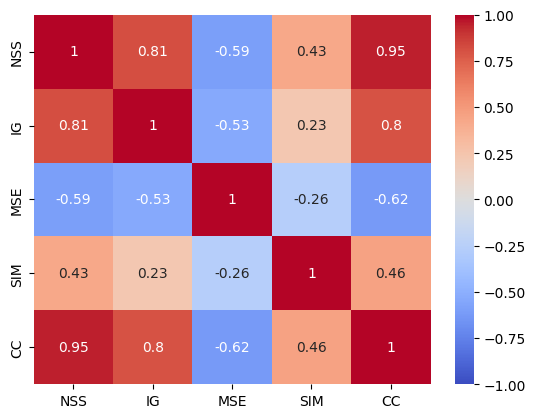

In [65]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 0.5

In [66]:
df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,-0.722261,-0.645939,1.999807e+00,0.890984,-0.658761
1,0.718348,0.864664,1.099765e+00,0.881238,0.621824
2,-0.630169,-0.851322,1.997413e+00,0.833347,-0.648406
3,0.261687,-0.268062,8.383788e-20,0.923350,0.131142
4,0.746474,0.925062,1.719240e-11,0.911930,0.451672


In [67]:
df.mean()

NSS    0.688073
IG     0.472035
MSE    0.281027
SIM    0.863424
CC     0.518444
dtype: float64

<AxesSubplot: >

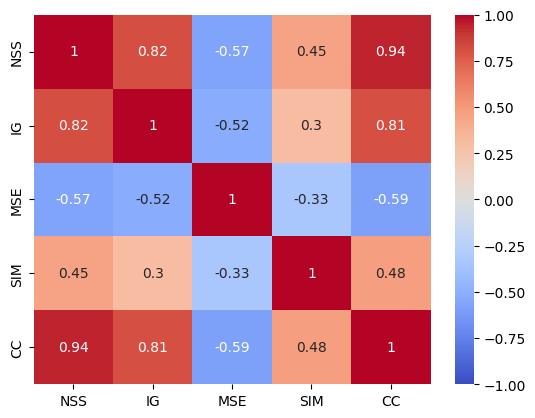

In [68]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [69]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,-0.680222,-0.772161,1.999999e+00,0.875100,-0.663649
1,0.442580,0.627799,1.967630e+00,0.875399,0.371672
2,-0.586448,-0.841558,1.999998e+00,0.842654,-0.597418
3,0.281689,-0.053329,7.954407e-19,0.885862,0.174331
4,0.067741,0.676754,1.550161e-05,0.845085,-0.052022


In [70]:
df.mean()

NSS    0.457377
IG     0.267854
MSE    0.460680
SIM    0.841026
CC     0.305746
dtype: float64

<AxesSubplot: >

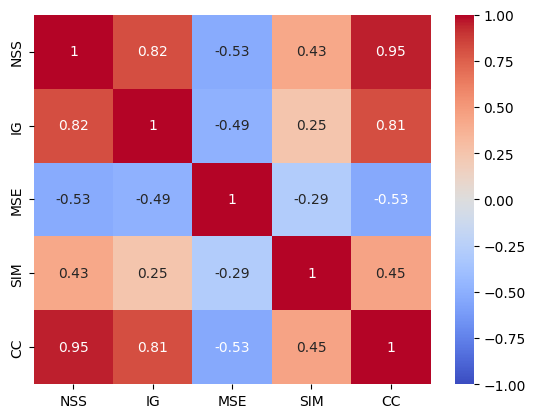

In [71]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

## VGG-16

#### Noise combined scale 0.5

In [72]:
import pandas as pd

df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.000000,0.000000e+00,NaN,1.000000,0.000000
1,0.000000,0.000000e+00,NaN,1.000000,0.000000
2,2.222983,2.160337e+00,1.027739e-19,0.800861,0.758335
3,0.000000,0.000000e+00,0.000000e+00,0.767140,0.000000
4,1.395091,5.090628e-09,4.184009e-31,0.807976,0.513252


In [73]:
df.mean()

NSS    0.345367
IG     0.354814
MSE    0.292055
SIM    0.837797
CC     0.208164
dtype: float64

<AxesSubplot: >

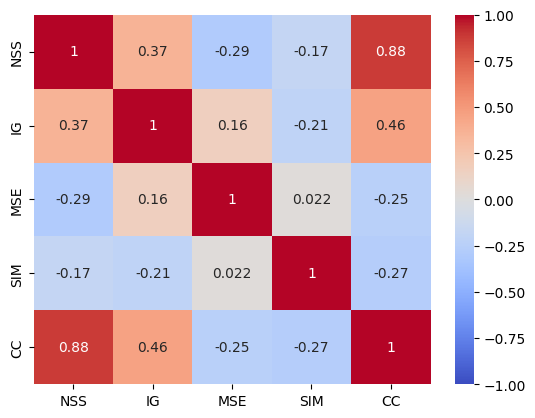

In [74]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 0.5

In [75]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.000000,0.000000e+00,NaN,1.000000,0.000000
1,0.000000,0.000000e+00,NaN,1.000000,0.000000
2,2.222983,2.160337e+00,1.027739e-19,0.800861,0.758335
3,0.000000,0.000000e+00,0.000000e+00,0.767140,0.000000
4,1.395091,5.090628e-09,4.184009e-31,0.807976,0.513252


In [76]:
df.mean()

NSS    0.345367
IG     0.354814
MSE    0.292055
SIM    0.837797
CC     0.208164
dtype: float64

<AxesSubplot: >

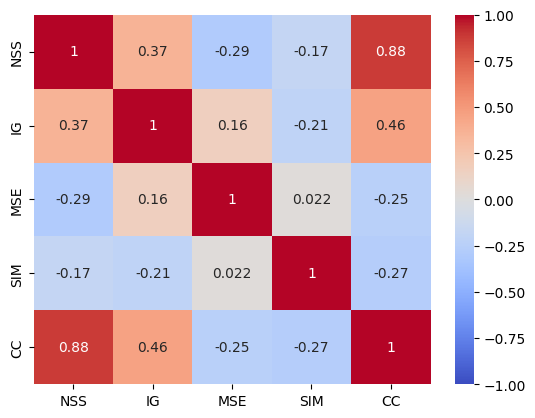

In [77]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise combined scale 1

In [78]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.000000,0.000000e+00,NaN,1.000000,0.000000
1,0.000000,0.000000e+00,NaN,1.000000,0.000000
2,2.331042,2.625506e+00,3.643979e-21,0.783841,0.769754
3,1.409637,8.786362e-12,0.000000e+00,0.623206,0.000000
4,1.151775,3.359035e-07,4.183952e-31,0.807976,0.458622


In [79]:
df.mean()

NSS    0.240730
IG     0.317356
MSE    0.482585
SIM    0.824586
CC     0.124309
dtype: float64

<AxesSubplot: >

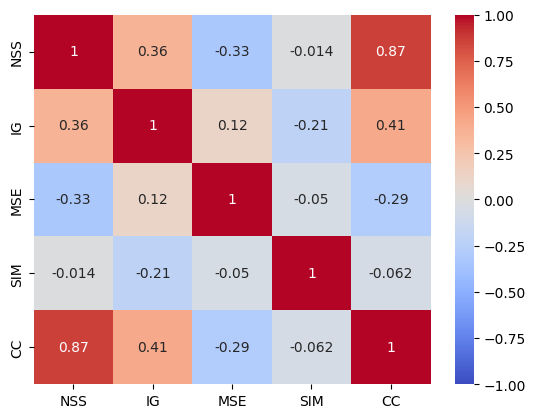

In [80]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [81]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.000000,0.000000e+00,NaN,1.000000,0.000000
1,0.000000,0.000000e+00,NaN,1.000000,0.000000
2,1.795696,4.884638e-12,2.229896e-39,0.882932,0.538177
3,-0.207313,5.163030e-01,2.000000e+00,0.506417,0.000000
4,-1.154091,2.899640e-01,1.200993e-07,0.228815,-0.431376


In [82]:
df.mean()

NSS    0.088086
IG     0.253020
MSE    0.827677
SIM    0.804450
CC     0.042949
dtype: float64

<AxesSubplot: >

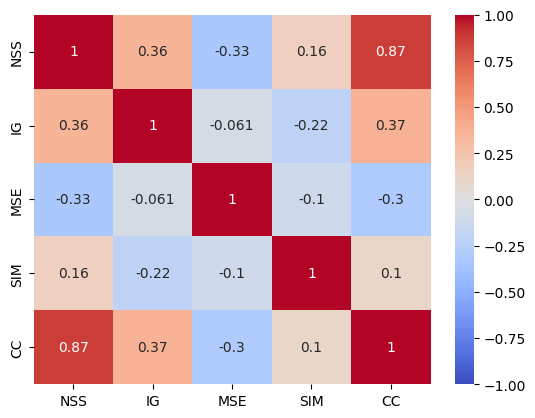

In [83]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1.5

In [84]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.000000,0.000000e+00,NaN,1.000000,0.000000
1,0.000000,0.000000e+00,NaN,1.000000,0.000000
2,1.862658,8.904218e-07,2.062805e-39,0.795799,0.584008
3,-0.075388,6.852681e-01,7.698245e-07,0.620297,0.000000
4,-1.244452,2.012369e-01,1.996919e+00,0.170141,-0.520428


In [85]:
df.mean()

NSS    0.041697
IG     0.212353
MSE    1.070933
SIM    0.792237
CC     0.020820
dtype: float64

<AxesSubplot: >

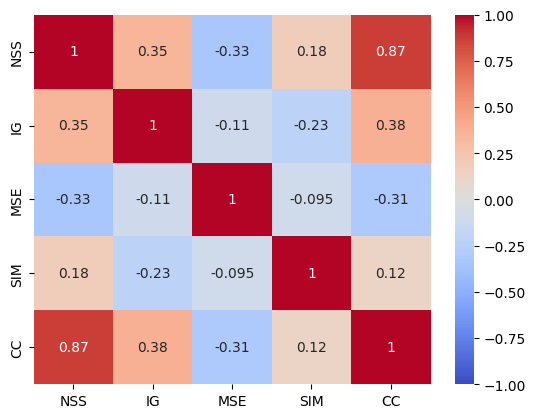

In [86]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

# Grad Cam ++

## VGG-16

#### Noise inverted scale 0.5

In [87]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,1.038014,0.188019,2.000000,0.722776,0.852600
1,0.685967,-0.136301,0.000000,0.709423,0.575796
2,0.983318,0.443650,1.578609,0.664979,0.797665
3,0.728024,0.297873,0.000000,0.700654,0.584323
4,0.287291,0.030145,1.865763,0.622748,0.306344


In [88]:
df.mean()

NSS    0.624332
IG     0.557657
MSE    0.523035
SIM    0.784846
CC     0.586899
dtype: float64

<AxesSubplot: >

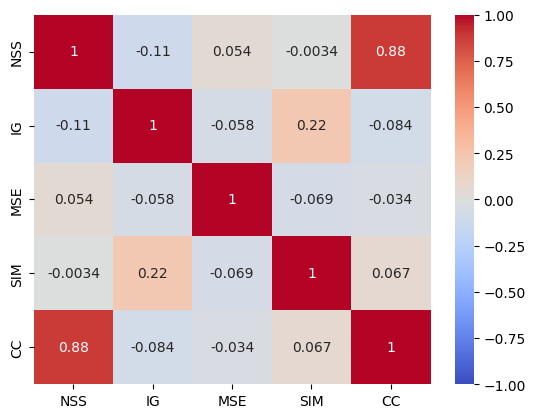

In [89]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

#### Noise inverted scale 1

In [90]:
df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.574134,-0.060918,2.00000,0.649653,0.493535
1,0.414449,-0.290956,0.00000,0.685507,0.305788
2,0.310331,-0.475485,2.00000,0.663783,0.281393
3,0.357930,0.472112,2.00000,0.534917,0.275007
4,0.263525,0.271636,1.69692,0.755720,0.211279


In [91]:
df.mean()

NSS    0.476593
IG     0.452077
MSE    0.960336
SIM    0.783417
CC     0.455999
dtype: float64

<AxesSubplot: >

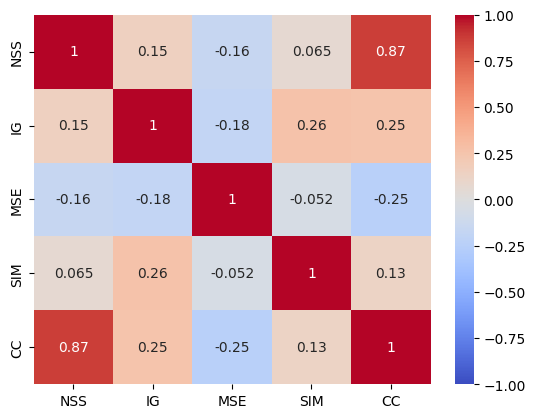

In [92]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="coolwarm",vmin=-1,vmax=1, annot=True)

# Noise statistics

### Resnet Grad Cam

In [93]:
import numpy as np

In [94]:
df_c_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv").replace(np.nan, 0)
df_c_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1.csv").replace(np.nan, 0)
df_c_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_1_5.csv").replace(np.nan, 0)

In [95]:
df_i_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv").replace(np.nan, 0)
df_i_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1.csv").replace(np.nan, 0)
df_i_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv").replace(np.nan, 0)

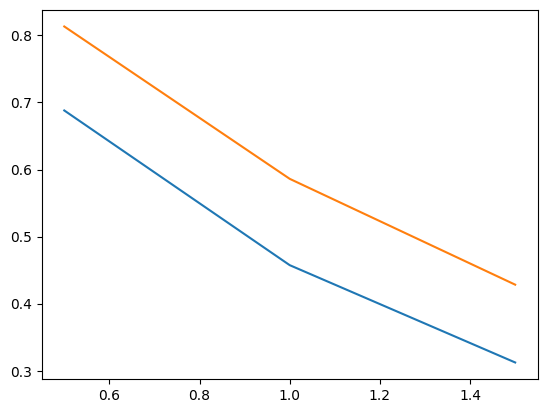

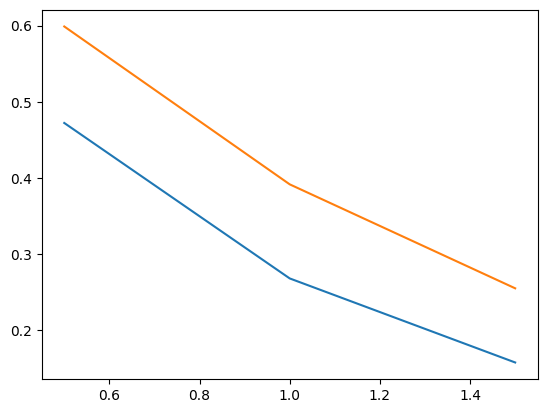

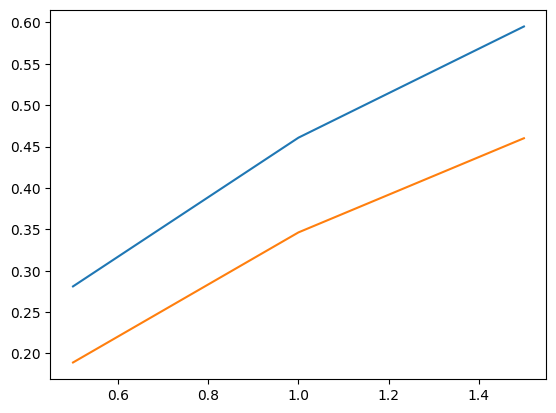

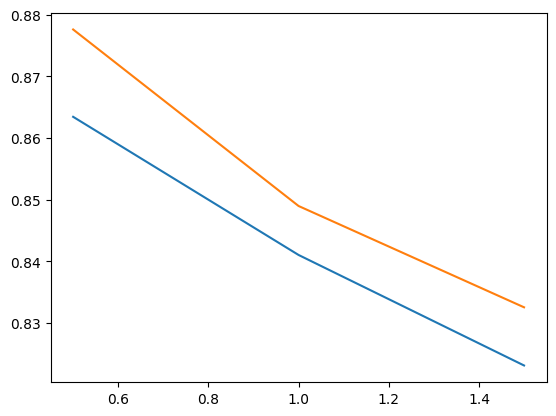

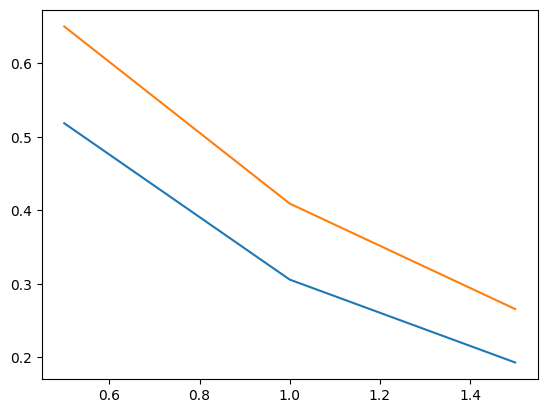

In [96]:
import matplotlib.pyplot as plt

for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    lst = [df_i_05_res[name].mean(),df_i_10_res[name].mean(),df_i_15_res[name].mean()]
    lst2 = [df_c_05_res[name].mean(),df_c_10_res[name].mean(),df_c_15_res[name].mean()]
    val = [0.5,1,1.5]
    plt.plot(val,lst)
    plt.plot(val,lst2)
    plt.show()

### VGG

In [97]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [98]:
df_c_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv").replace(np.nan, 0)
df_c_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1.csv").replace(np.nan, 0)
df_c_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_1_5.csv").replace(np.nan, 0)

In [99]:
df_i_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_0_5.csv").replace(np.nan, 0)
df_i_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1.csv").replace(np.nan, 0)
df_i_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_inverted_noise_1_5.csv").replace(np.nan, 0)

NSS
0.5861137046155209 0.24072973972857542
IG
0.39142276773416507 0.3173560937064499
MSE
0.34625702869424646 0.25996324512608926
SIM
0.8489646260736607 0.8245863636879072
CC
0.4091745791536087 0.12430915457160359


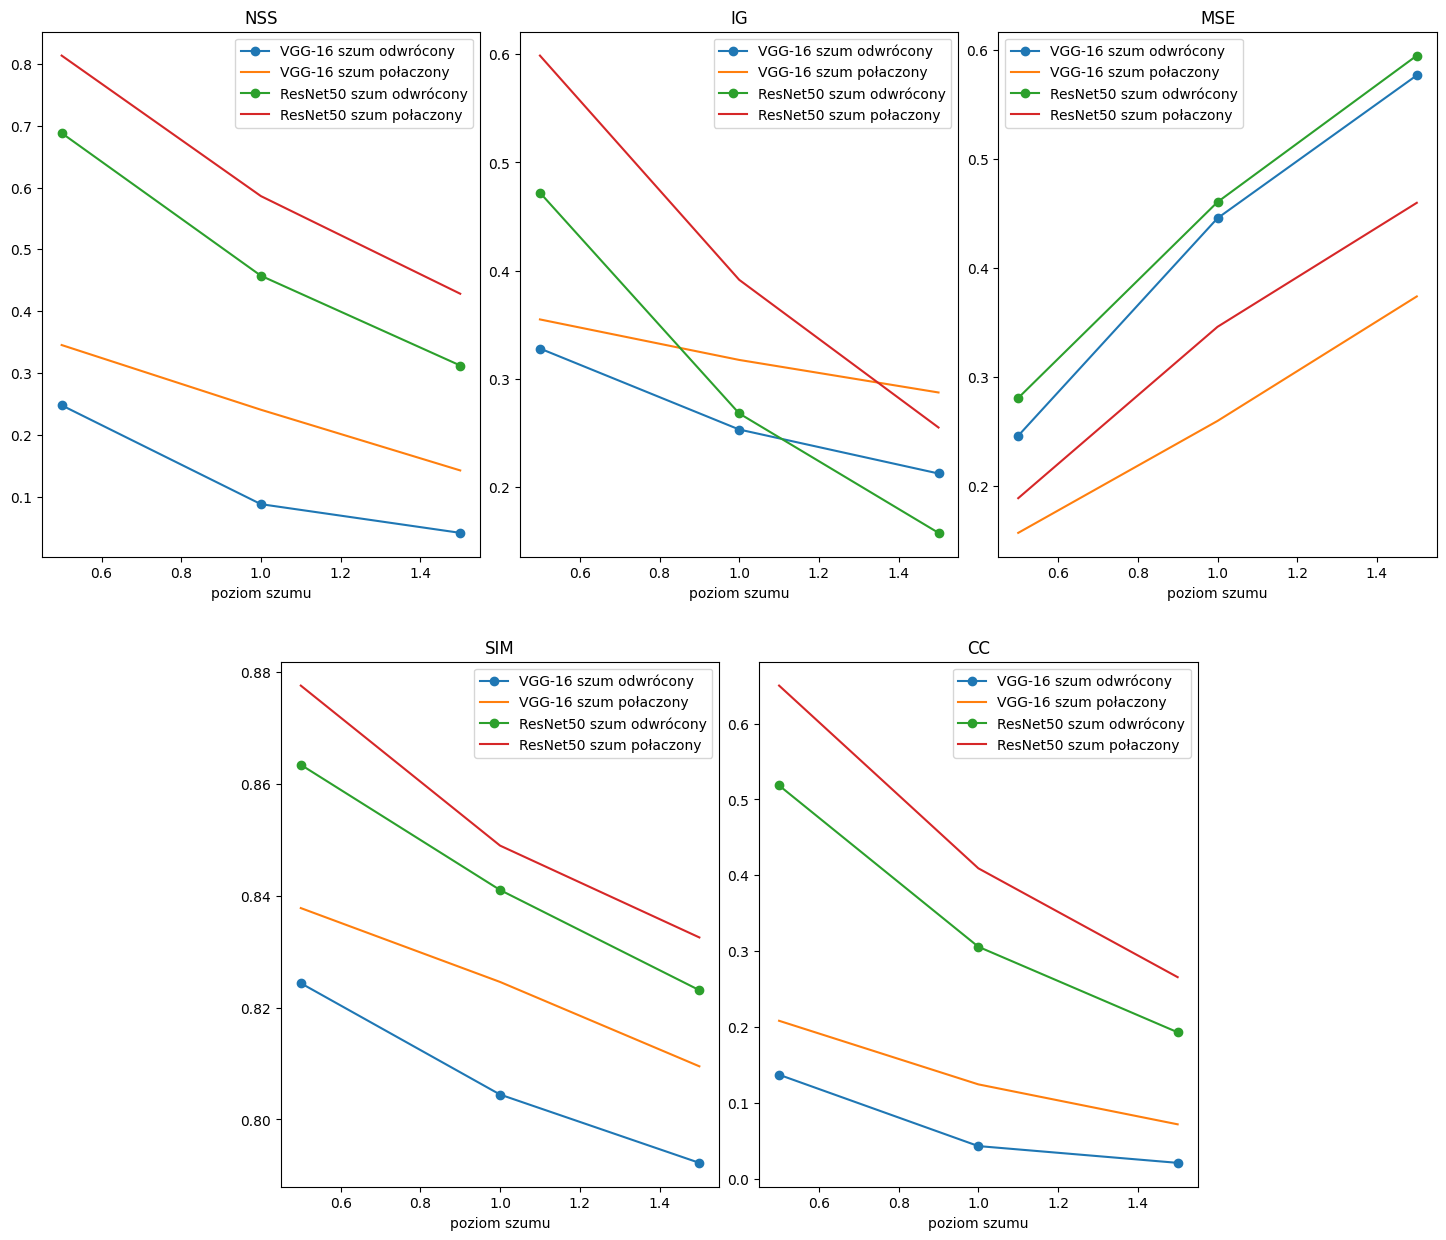

In [100]:

fig = plt.figure()
fig.set_size_inches(18,15)
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax = [0,0,0,0,0]

ax[0] = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax[1] = fig.add_subplot(spec[0,2:4])
ax[2] = fig.add_subplot(spec[0,4:])
ax[3] = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax[4] = fig.add_subplot(spec[1,3:5])

for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    lst = [df_i_05_VGG[name].mean(),df_i_10_VGG[name].mean(),df_i_15_VGG[name].mean()]
    lst2 = [df_c_05_VGG[name].mean(),df_c_10_VGG[name].mean(),df_c_15_VGG[name].mean()]
    val = [0.5,1,1.5]
    print(name)
    print(df_c_10_res[name].mean(),df_c_10_VGG[name].mean())
    ax[i].set_title(name)
    ax[i].plot(val,lst, 'o-', label = "VGG-16 szum odwrócony")
    ax[i].plot(val,lst2, label = "VGG-16 szum połaczony")
    lst = [df_i_05_res[name].mean(),df_i_10_res[name].mean(),df_i_15_res[name].mean()]
    lst2 = [df_c_05_res[name].mean(),df_c_10_res[name].mean(),df_c_15_res[name].mean()]
    val = [0.5,1,1.5]
    ax[i].plot(val,lst,'o-', label = "ResNet50 szum odwrócony")
    ax[i].plot(val,lst2, label = "ResNet50 szum połaczony")
    ax[i].set_xlabel("poziom szumu")
    ax[i].legend()

plt.show()

<AxesSubplot: title={'center': 'VGG-16\npoziom szumu: s = 1.5'}>

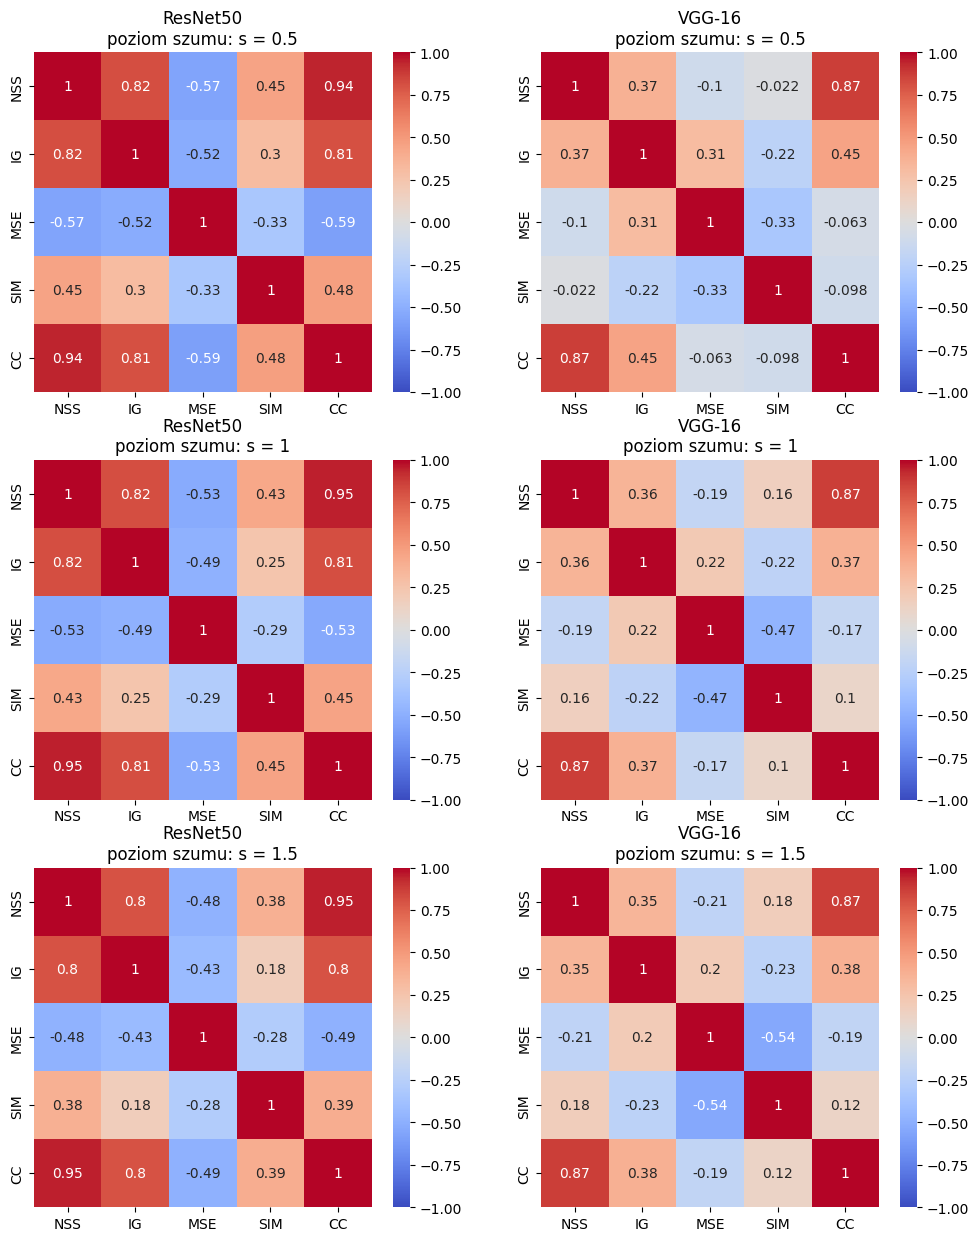

In [101]:
import seaborn as sb
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,2)
fig.set_size_inches(12,15)
for i,lvl in enumerate([0.5,1,1.5]):
    for j,name in enumerate(["ResNet50", "VGG-16"]):
        ax[i,j].set_title(f"{name}\npoziom szumu: s = {lvl}")
corr = df_i_05_res.corr()
sb.heatmap(corr,ax=ax[0,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_10_res.corr()
sb.heatmap(corr,ax=ax[1,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_15_res.corr()
sb.heatmap(corr,ax=ax[2,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_05_VGG.corr()
sb.heatmap(corr,ax=ax[0,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_10_VGG.corr()
sb.heatmap(corr,ax=ax[1,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_15_VGG.corr()
sb.heatmap(corr,ax=ax[2,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

<AxesSubplot: title={'center': 'VGG-16\npoziom szumu: s = 1.5'}>

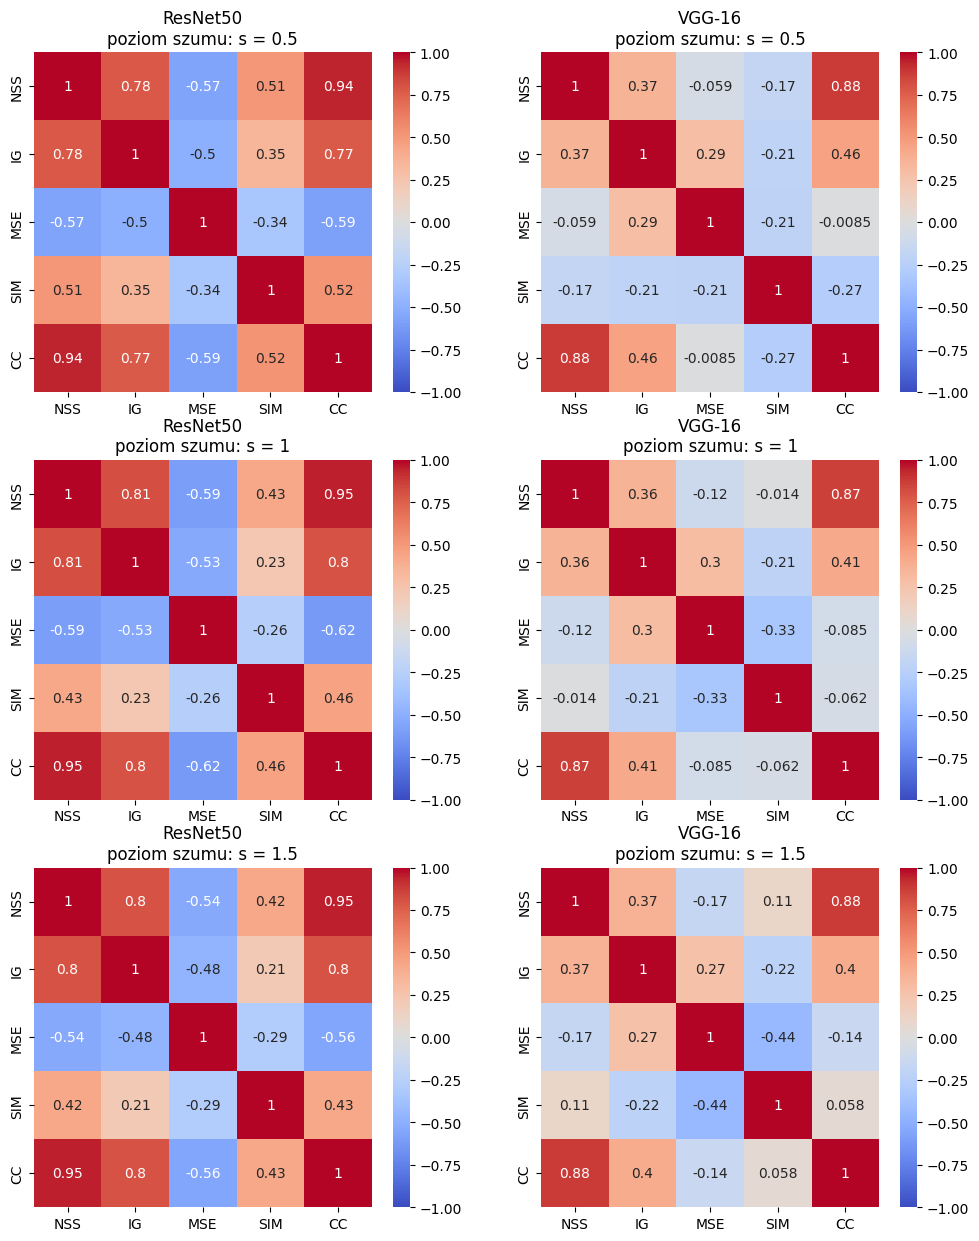

In [102]:
import seaborn as sb
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,2)
fig.set_size_inches(12,15)
for i,lvl in enumerate([0.5,1,1.5]):
    for j,name in enumerate(["ResNet50", "VGG-16"]):
        ax[i,j].set_title(f"{name}\npoziom szumu: s = {lvl}")
corr = df_c_05_res.corr()
sb.heatmap(corr,ax=ax[0,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_10_res.corr()
sb.heatmap(corr,ax=ax[1,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_15_res.corr()
sb.heatmap(corr,ax=ax[2,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_05_VGG.corr()
sb.heatmap(corr,ax=ax[0,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_10_VGG.corr()
sb.heatmap(corr,ax=ax[1,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_15_VGG.corr()
sb.heatmap(corr,ax=ax[2,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)


<AxesSubplot: title={'center': 'VGG-16'}>

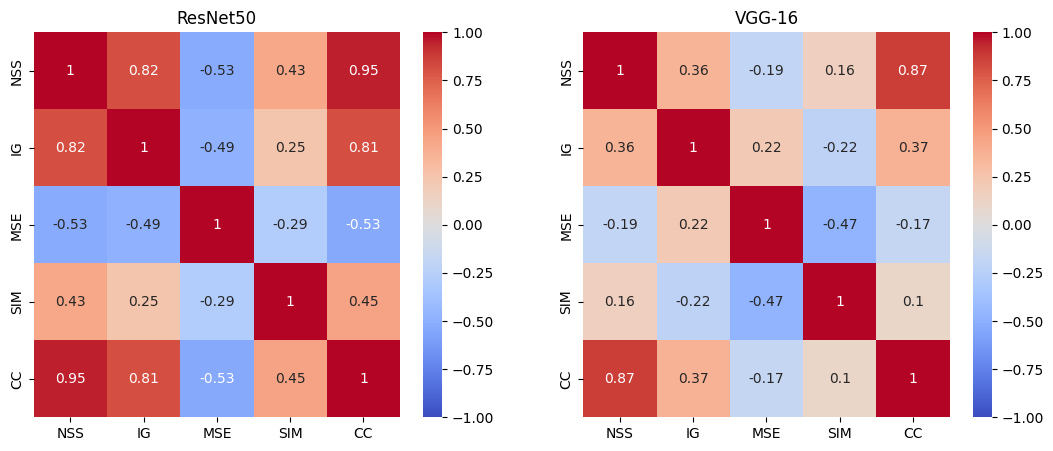

In [103]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(13,5)
for j,name in enumerate(["ResNet50", "VGG-16"]):
    ax[j].set_title(f"{name}")

corr = df_i_10_res.corr()
sb.heatmap(corr,ax=ax[0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

corr = df_i_10_VGG.corr()
sb.heatmap(corr,ax=ax[1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)


#### Grad Cam ++

In [104]:
df_c_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_0_5.csv").replace(np.nan, 0)
df_c_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_1.csv").replace(np.nan, 0)
df_c_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_1_5.csv").replace(np.nan, 0)

In [105]:
df_i_05_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_0_5.csv").replace(np.nan, 0)
df_i_10_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1.csv").replace(np.nan, 0)
df_i_15_VGG = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1_5.csv").replace(np.nan, 0)

In [106]:
df_c_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_0_5.csv").replace(np.nan, 0)
df_c_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_1.csv").replace(np.nan, 0)
df_c_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_combained_noise_1_5.csv").replace(np.nan, 0)

In [107]:
df_i_05_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_0_5.csv").replace(np.nan, 0)
df_i_10_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1.csv").replace(np.nan, 0)
df_i_15_res = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_plus_plus_inverted_noise_1_5.csv").replace(np.nan, 0)

In [108]:
for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    print(name)
    print(df_c_10_res[name].mean(),df_c_10_VGG[name].mean())

NSS
0.6176058344601211 0.6083355947796928
IG
-0.598986098980087 0.5777354318023157
MSE
0.29564399013475706 0.593060876568295
SIM
0.7905541126682157 0.7741464081415834
CC
0.5366969886479289 0.5640068941355297


NSS
0.6176058344601211 0.6083355947796928
IG
-0.598986098980087 0.5777354318023157
MSE
0.29564399013475706 0.593060876568295
SIM
0.7905541126682157 0.7741464081415834
CC
0.5366969886479289 0.5640068941355297


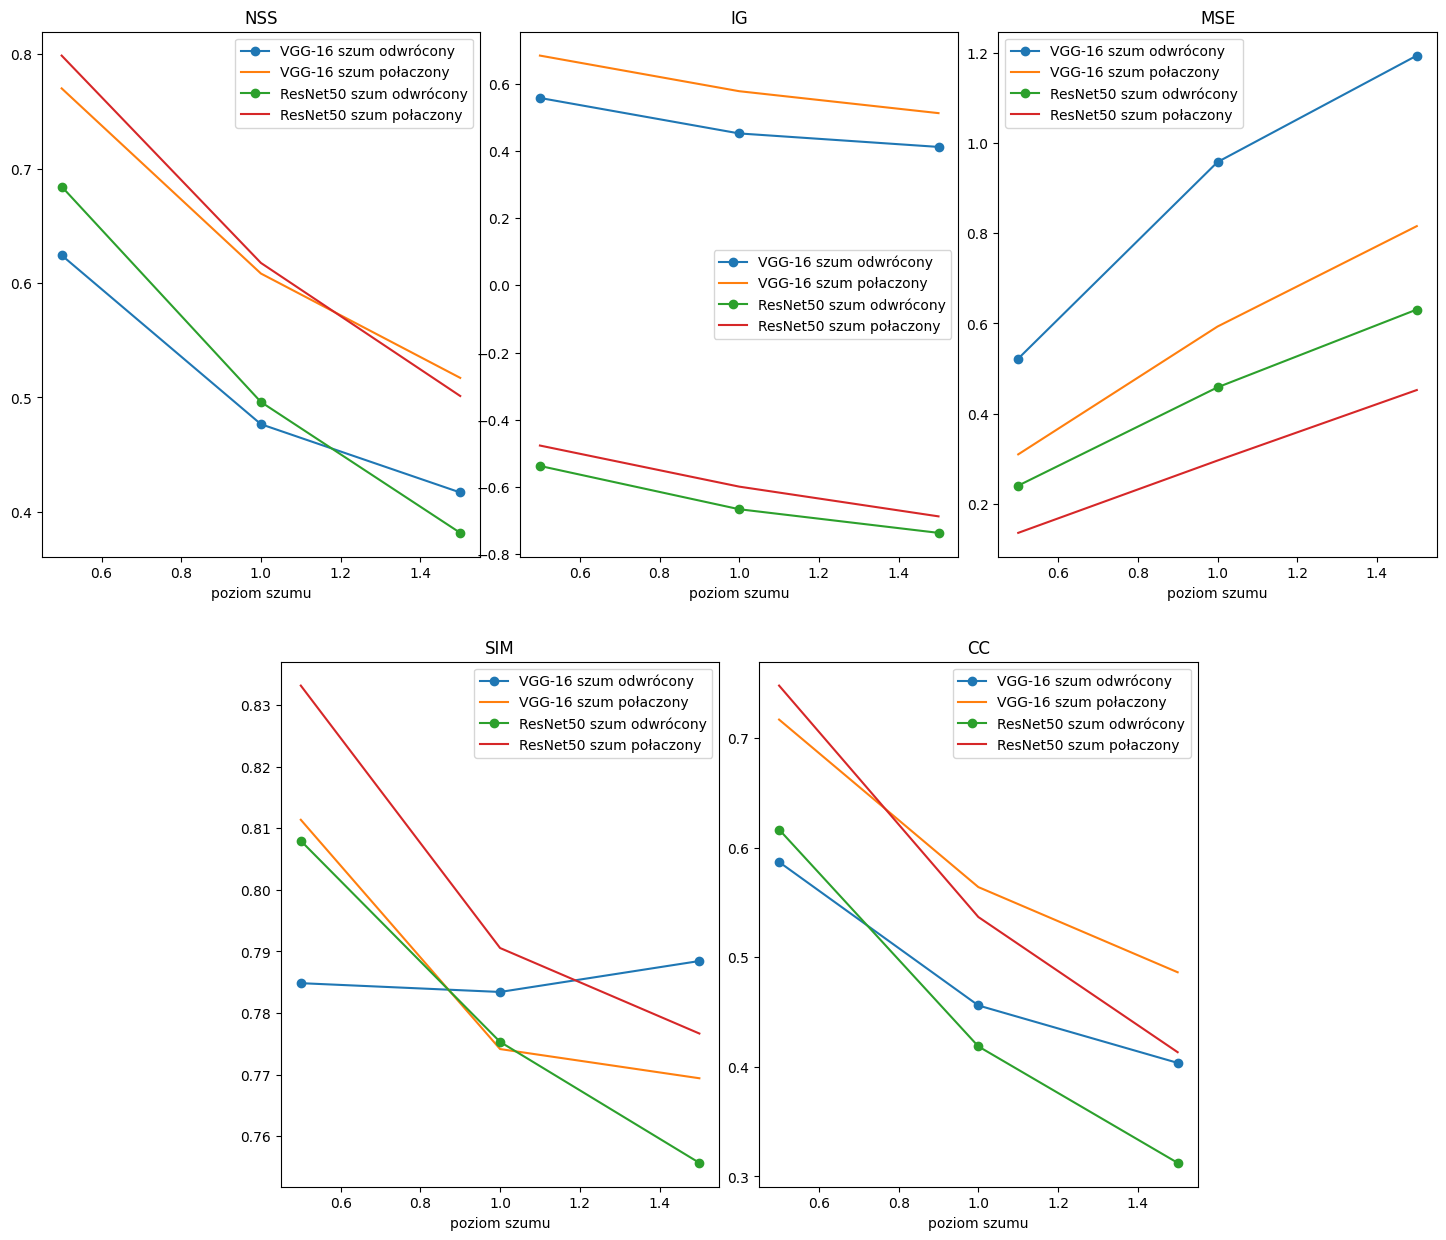

In [109]:

fig = plt.figure()
fig.set_size_inches(18,15)
spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) # 6 columns evenly divides both 2 & 3

ax = [0,0,0,0,0]

ax[0] = fig.add_subplot(spec[0,0:2]) # row 0 with axes spanning 2 cols on evens
ax[1] = fig.add_subplot(spec[0,2:4])
ax[2] = fig.add_subplot(spec[0,4:])
ax[3] = fig.add_subplot(spec[1,1:3]) # row 0 with axes spanning 2 cols on odds
ax[4] = fig.add_subplot(spec[1,3:5])

for i,name in enumerate(["NSS","IG","MSE","SIM","CC"]):
    lst = [df_i_05_VGG[name].mean(),df_i_10_VGG[name].mean(),df_i_15_VGG[name].mean()]
    lst2 = [df_c_05_VGG[name].mean(),df_c_10_VGG[name].mean(),df_c_15_VGG[name].mean()]
    val = [0.5,1,1.5]
    print(name)
    print(df_c_10_res[name].mean(),df_c_10_VGG[name].mean())
    ax[i].set_title(name)
    ax[i].plot(val,lst, 'o-', label = "VGG-16 szum odwrócony")
    ax[i].plot(val,lst2, label = "VGG-16 szum połaczony")
    lst = [df_i_05_res[name].mean(),df_i_10_res[name].mean(),df_i_15_res[name].mean()]
    lst2 = [df_c_05_res[name].mean(),df_c_10_res[name].mean(),df_c_15_res[name].mean()]
    val = [0.5,1,1.5]
    ax[i].plot(val,lst,'o-', label = "ResNet50 szum odwrócony")
    ax[i].plot(val,lst2, label = "ResNet50 szum połaczony")
    ax[i].set_xlabel("poziom szumu")
    ax[i].legend()

plt.show()

<AxesSubplot: title={'center': 'VGG-16\npoziom szumu: s = 1.5'}>

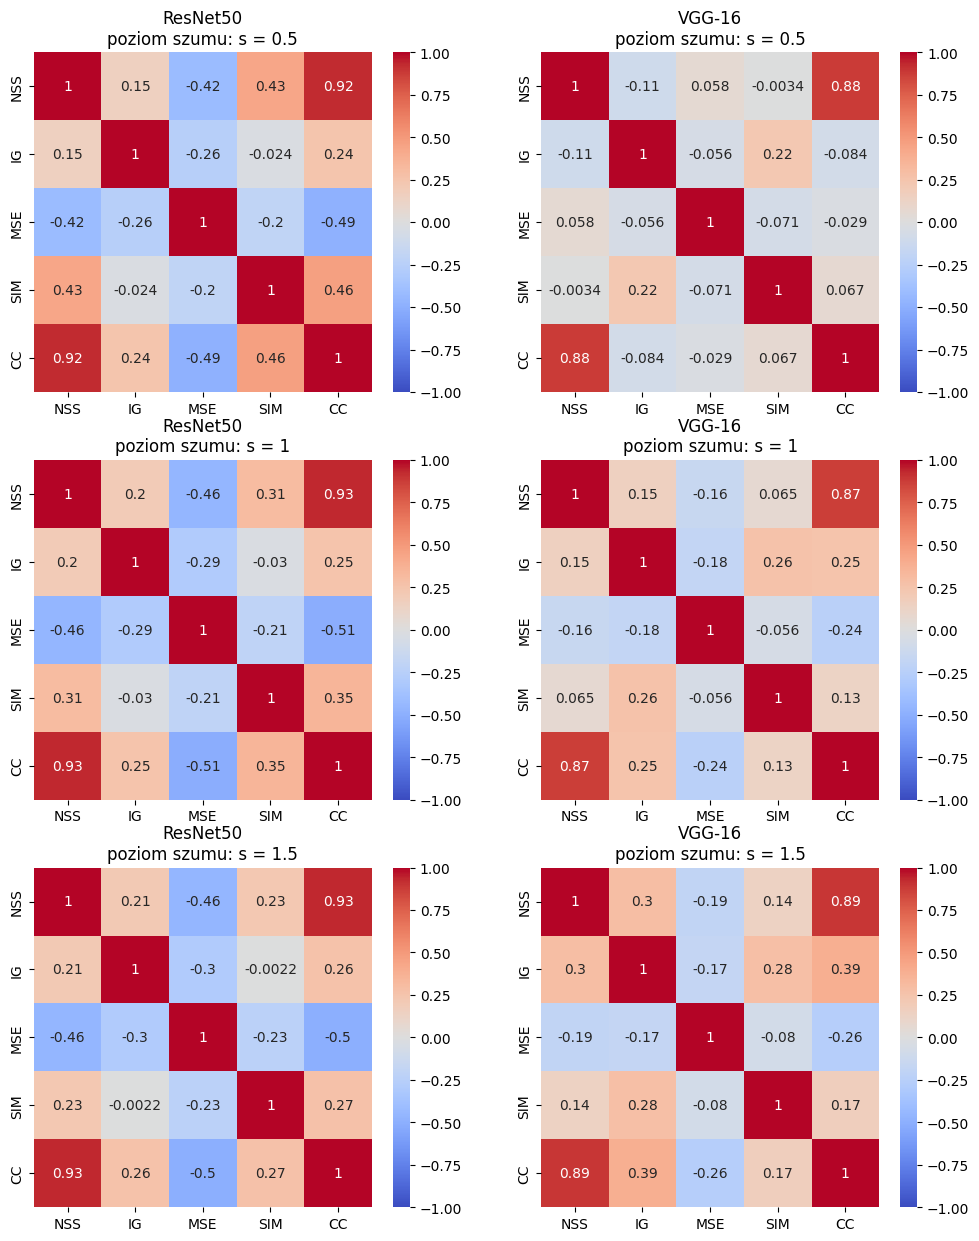

In [110]:
import seaborn as sb
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,2)
fig.set_size_inches(12,15)
for i,lvl in enumerate([0.5,1,1.5]):
    for j,name in enumerate(["ResNet50", "VGG-16"]):
        ax[i,j].set_title(f"{name}\npoziom szumu: s = {lvl}")
corr = df_i_05_res.corr()
sb.heatmap(corr,ax=ax[0,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_10_res.corr()
sb.heatmap(corr,ax=ax[1,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_15_res.corr()
sb.heatmap(corr,ax=ax[2,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_05_VGG.corr()
sb.heatmap(corr,ax=ax[0,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_10_VGG.corr()
sb.heatmap(corr,ax=ax[1,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_i_15_VGG.corr()
sb.heatmap(corr,ax=ax[2,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

<AxesSubplot: title={'center': 'VGG-16\npoziom szumu: s = 1.5'}>

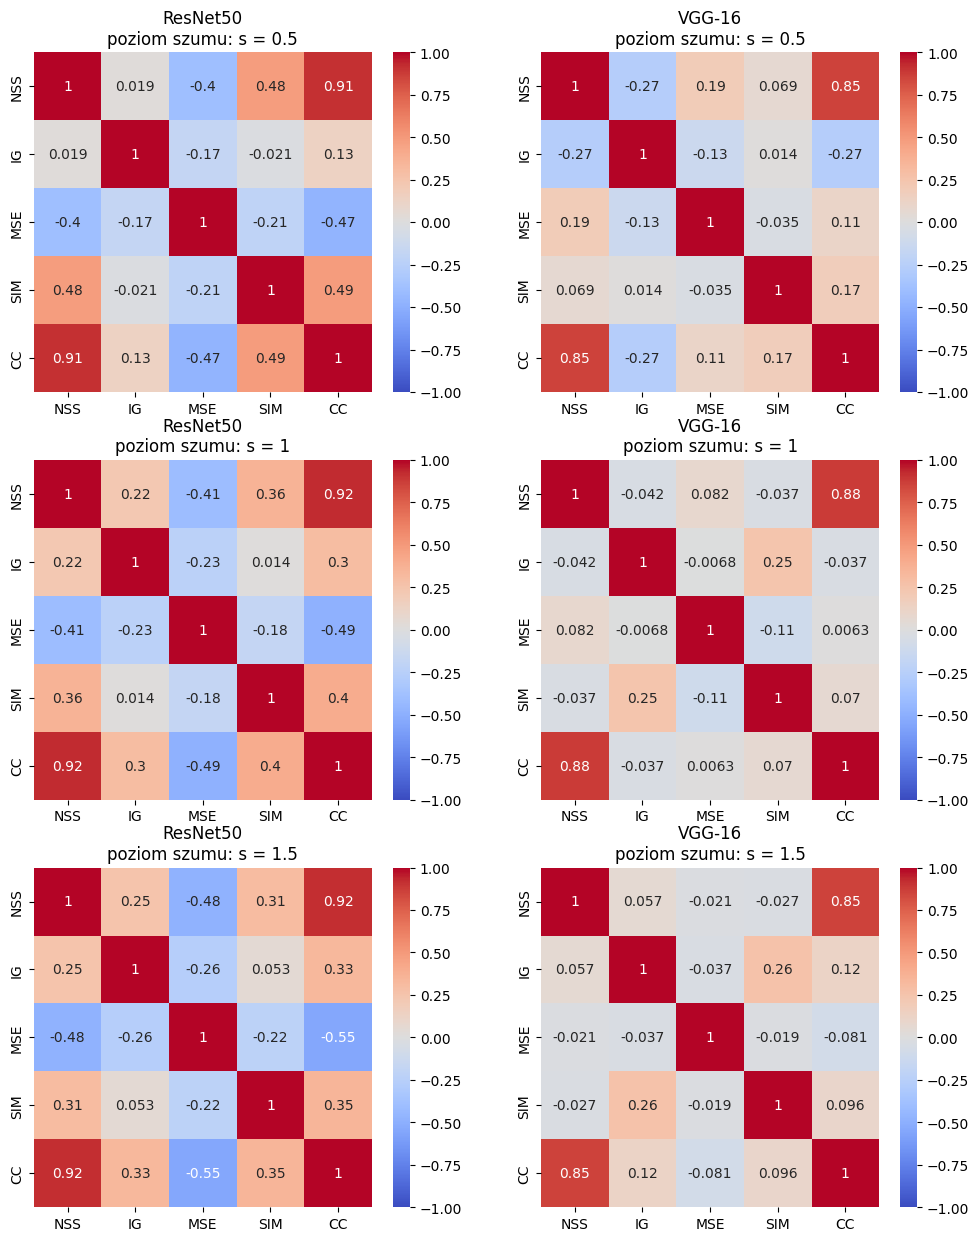

In [111]:
import seaborn as sb
import matplotlib.pyplot as plt
fig,ax = plt.subplots(3,2)
fig.set_size_inches(12,15)
for i,lvl in enumerate([0.5,1,1.5]):
    for j,name in enumerate(["ResNet50", "VGG-16"]):
        ax[i,j].set_title(f"{name}\npoziom szumu: s = {lvl}")
corr = df_c_05_res.corr()
sb.heatmap(corr,ax=ax[0,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_10_res.corr()
sb.heatmap(corr,ax=ax[1,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_15_res.corr()
sb.heatmap(corr,ax=ax[2,0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_05_VGG.corr()
sb.heatmap(corr,ax=ax[0,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_10_VGG.corr()
sb.heatmap(corr,ax=ax[1,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)
corr = df_c_15_VGG.corr()
sb.heatmap(corr,ax=ax[2,1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

<AxesSubplot: title={'center': 'VGG-16'}>

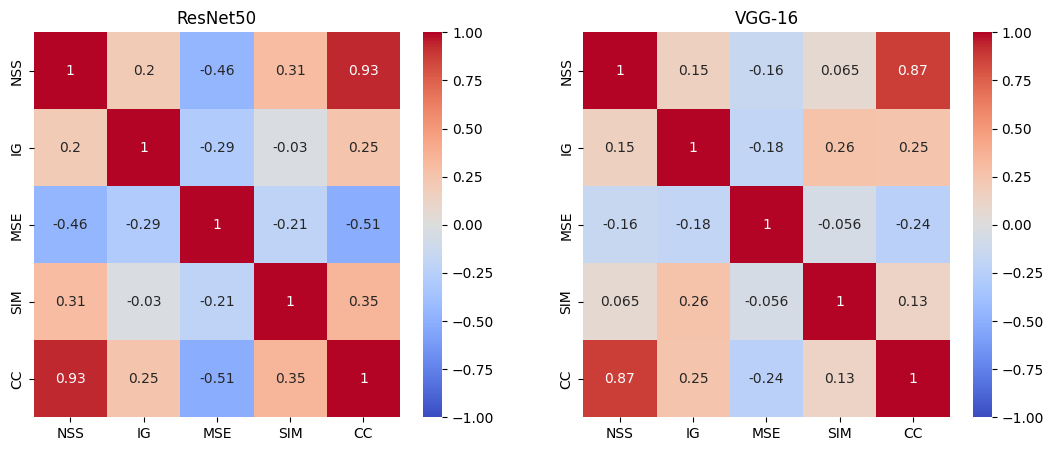

In [112]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(13,5)
for j,name in enumerate(["ResNet50", "VGG-16"]):
    ax[j].set_title(f"{name}")

corr = df_i_10_res.corr()
sb.heatmap(corr,ax=ax[0], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

corr = df_i_10_VGG.corr()
sb.heatmap(corr,ax=ax[1], cmap="coolwarm",vmin=-1,vmax=1, annot=True)

### Metrics per class 

In [113]:
DS_LABELS = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway","Industrial","Pasture","PermanentCrop",
             "Residential", "River", "SeaLake"]

In [114]:
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())
print(true_val)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[9, 0, 9, 1, 2, 3, 0, 3, 0, 1, 1, 2, 8, 7, 2, 7, 1, 3, 6, 9, 9, 2, 5, 5, 0, 0, 3, 4, 2, 1, 0, 1, 1, 0, 8, 5, 3, 3, 6, 9, 0, 7, 0, 1, 9, 2, 1, 7, 0, 8, 5, 8, 3, 7, 7, 2, 5, 3, 9, 3, 1, 9, 2, 3, 5, 5, 4, 7, 1, 1, 2, 1, 9, 9, 5, 1, 6, 9, 8, 8, 4, 4, 3, 2, 8, 7, 0, 4, 3, 9, 1, 4, 4, 3, 2, 2, 0, 8, 9, 8, 9, 5, 7, 9, 6, 7, 6, 8, 4, 5, 6, 3, 4, 7, 0, 5, 6, 6, 7, 8, 0, 6, 4, 5, 9, 8, 1, 2, 9, 8, 1, 0, 0, 0, 6, 9, 7, 0, 0, 8, 1, 0, 7, 6, 2, 1, 8, 7, 5, 8, 7, 6, 7, 9, 2, 8, 2, 0, 7, 7, 0, 2, 5, 2, 9, 2, 3, 2, 9, 2, 7, 1, 5, 5, 3, 1, 4, 5, 0, 9, 4, 1, 3, 0, 1, 9, 2, 2, 3, 4, 7, 9, 8, 4, 7, 8, 6, 1, 4, 0, 9, 7, 0, 7, 4, 5, 2, 0, 8, 9, 3, 0, 0, 2, 0, 9, 0, 3, 9, 5, 0, 0, 4, 4, 6, 7, 4, 3, 5, 0, 1, 9, 2, 9, 5, 3, 4, 9, 6, 7, 7, 3, 7, 6, 8, 8, 3, 3, 6, 0, 9, 4, 6, 1, 6, 2, 1, 3, 9, 4, 2, 1, 2, 7, 0, 7, 1, 1, 7, 8, 4, 9, 4, 5, 0, 8, 8, 7, 8, 7, 1, 3, 1, 9, 7, 9, 4, 8, 0, 3, 4, 7, 5, 8, 9, 2, 0, 2, 8, 7, 3, 7, 7, 3, 0, 7, 6, 4, 9, 2, 0, 2, 3, 2, 6, 9, 4, 1, 9, 4, 7, 8, 1, 1, 9, 8, 9, 5, 7, 3, 4, 0, 5, 

In [115]:
class_metric = np.zeros([10,5])
for i in range(10):
    true_val_ = np.array(true_val) == i
    class_metric[i] = df_c_10_res[true_val_].mean().to_numpy()

In [116]:
print(class_metric)

[[ 0.62916696 -0.56691941  0.48692597  0.71385887  0.44482686]
 [ 0.61601124  0.15288531  0.00759054  0.8083162   0.66221852]
 [ 0.68176709 -0.35006277  0.16239238  0.79834746  0.56645837]
 [ 1.20903322 -0.95454529  0.12028389  0.87921042  0.87036706]
 [ 0.82269385 -0.67660356  0.06533749  0.83063059  0.80115528]
 [ 0.47830945 -0.77169732  0.47108886  0.77828119  0.41283754]
 [ 0.70287676 -0.50430346  0.30335662  0.79553637  0.54558063]
 [ 0.82017419 -0.38748589  0.00175225  0.83103802  0.89397866]
 [ 0.79128381 -1.09912263  0.23027769  0.81447198  0.60467142]
 [-0.43884171 -0.97254987  1.05772849  0.67975505 -0.34206195]]


In [117]:
from pytorch_grad_cam import GradCAM, GradCAMPlusPlus
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt
import numpy as np
from src.faithfulness.perturbation import eurosat_perturbation, thr_fc, thr_fc_bin,eurosat_perturbation_inverted
from src.faithfulness.silency_map import Silency_map_gen
# model

resnet50 = torch.load("finished\\ResNet50_new\\resnet50_model.pth")
fc_ = list(resnet50.fc)
fc_.append(torch.nn.Softmax(dim=1))
resnet50.fc = torch.nn.Sequential(*fc_)
resnet50.eval()

resnet50.cuda()

# dataset:

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224,antialias=None),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)
ds_test = Test_Dataset_EuroSat(ds)

# target layer:
nr = 25
cam_type = "grad_cam"

target_layers = [resnet50.layer4[-1]]
targets = None

sil_gen = Silency_map_gen(resnet50, ds_test, target_layers)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [120]:
lst_false = [(8, 1, 34), (5, 0, 35), (3, 8, 36), (9, 6, 58), (1, 5, 69), (5, 2, 109), (6, 2, 110), (8, 3, 125), (8, 6, 129), (8, 3, 139), (3, 6, 182), (7, 2, 203), (1, 8, 230), (3, 6, 235), (3, 2, 247), (6, 2, 248), (2, 5, 255), (3, 8, 289), (5, 8, 292), (0, 8, 335), (0, 6, 402), (6, 4, 403), (8, 3, 420), (5, 9, 449), (0, 6, 457), (9, 8, 466), (3, 6, 485), (3, 6, 492), (6, 4, 514), (3, 8, 541), (6, 4, 577), (0, 9, 588), (6, 2, 599), (6, 3, 606), (0, 2, 620), (6, 0, 633), (8, 9, 636), (6, 0, 672), (4, 3, 691), (2, 1, 713), (0, 6, 736), (3, 8, 747), (3, 6, 769), (2, 6, 776), (5, 0, 821), (0, 8, 836), (8, 3, 847), (8, 3, 879), (1, 5, 888), (0, 6, 900), (3, 4, 928), (5, 0, 934), (6, 4, 936), (5, 3, 966), (5, 9, 986), (8, 0, 988), (3, 4, 993), (3, 8, 1006), (9, 6, 1012), (6, 4, 1058), (5, 8, 1072), (0, 2, 1074), (1, 9, 1078), (5, 1, 1109), (4, 7, 1129), (2, 6, 1146), (3, 2, 1150), (8, 3, 1160), (5, 6, 1181), (3, 6, 1194), (6, 7, 1230), (8, 3, 1235), (5, 8, 1236), (8, 3, 1244), (5, 2, 1268), (3, 8, 1276), (5, 2, 1292), (5, 9, 1293), (2, 7, 1299), (5, 6, 1306), (7, 4, 1307), (5, 0, 1309), (4, 7, 1320), (3, 4, 1329), (3, 8, 1333), (3, 0, 1363), (3, 2, 1386), (6, 2, 1397), (0, 6, 1465), (3, 8, 1468), (0, 6, 1477), (5, 1, 1534), (3, 8, 1550), (3, 8, 1567), (5, 0, 1585), (6, 4, 1606), (5, 8, 1633), (3, 8, 1656), (1, 8, 1660), (2, 7, 1674), (5, 6, 1681), (3, 8, 1683), (2, 5, 1689), (5, 0, 1692), (5, 1, 1693), (0, 6, 1714), (3, 0, 1741), (5, 2, 1748), (3, 8, 1754), (0, 8, 1755), (6, 4, 1766), (5, 1, 1777), (5, 8, 1794), (8, 2, 1798), (4, 7, 1811), (3, 0, 1841), (3, 9, 1853), (8, 5, 1868), (0, 4, 1877), (5, 8, 1918), (1, 2, 1942), (3, 6, 1984), (8, 5, 1987), (8, 3, 2007), (8, 3, 2039), (4, 7, 2052), (3, 8, 2087), (8, 9, 2104), (8, 0, 2105), (5, 0, 2110), (0, 6, 2134), (6, 2, 2150), (5, 4, 2163), (8, 3, 2176), (2, 6, 2183), (1, 2, 2184), (8, 3, 2193), (6, 2, 2198), (6, 3, 2199), (6, 0, 2212), (0, 9, 2239), (6, 0, 2281), (6, 3, 2285), (5, 7, 2286), (2, 6, 2321), (3, 6, 2330), (3, 0, 2333), (2, 6, 2340), (5, 8, 2357), (3, 6, 2368), (5, 2, 2381), (0, 8, 2382), (6, 4, 2396), (5, 1, 2420), (5, 1, 2430), (3, 7, 2445), (3, 0, 2452), (3, 8, 2506), (4, 7, 2573), (0, 5, 2603), (3, 6, 2619), (0, 9, 2649), (0, 9, 2654), (0, 6, 2656), (6, 2, 2691), (6, 3, 2694), (8, 3, 2697)]

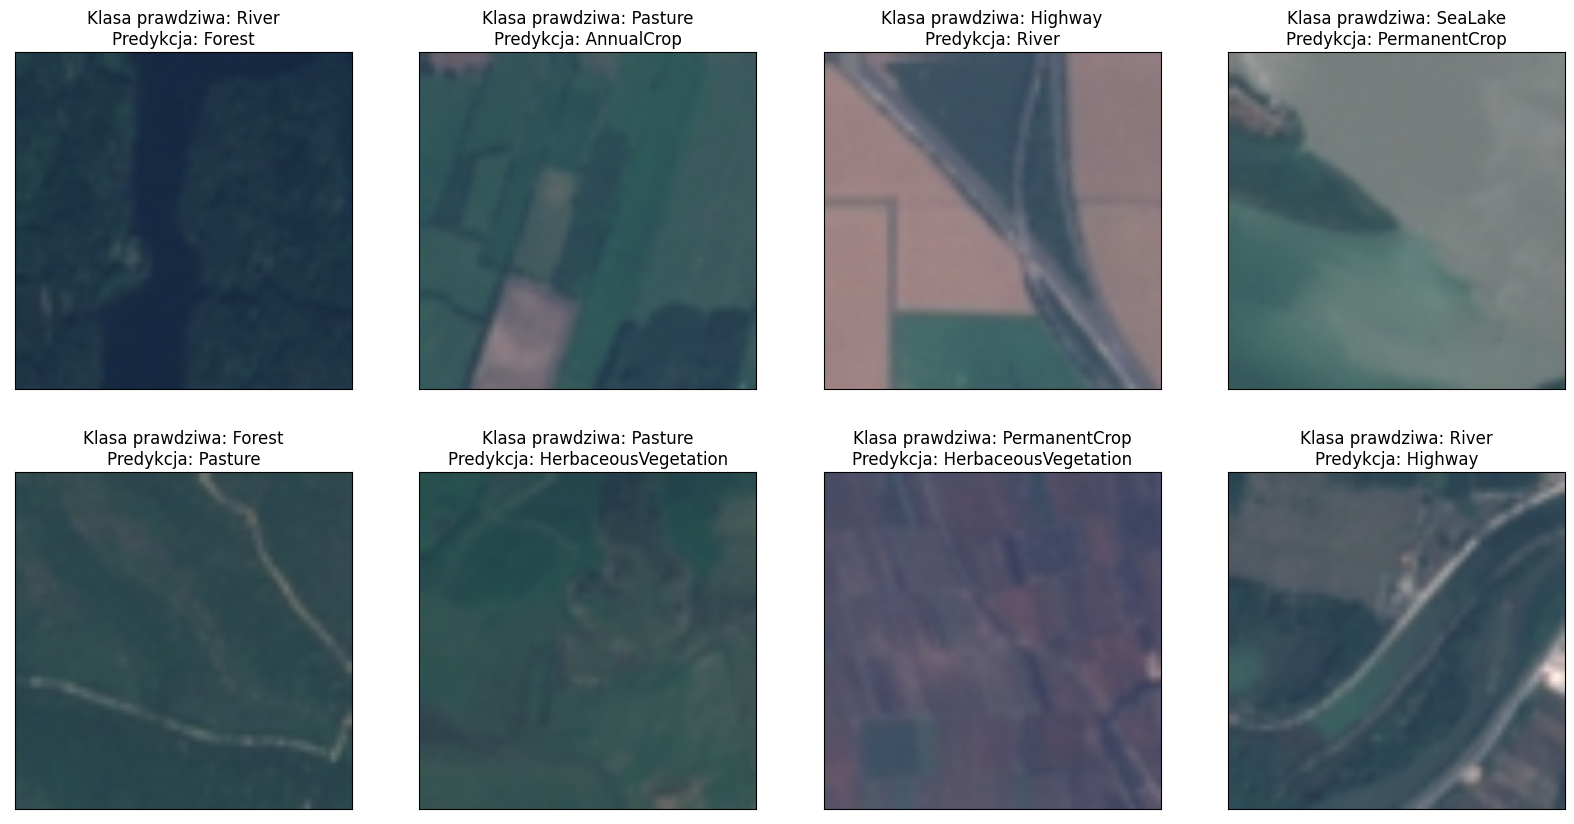

In [123]:
baseline_im = torch.zeros(sil_gen.ds[0][0].shape)
baseline_sl = sil_gen.get_silency_map_input(baseline_im,cam_type=cam_type)
cam_image = show_cam_on_image(torch.transpose(baseline_im.T,1,0).numpy(), baseline_sl, use_rgb=True)
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for nr,i,j,temp in zip([368,362,231,135,103,98,124,0],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    ax[i,j].imshow(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy())
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")

In [124]:
lst_false = [(3, 7, 5), (0, 9, 8), (0, 6, 183), (0, 6, 331), (9, 8, 466), (1, 2, 490), (6, 2, 524), (0, 2, 620), (6, 5, 633), (8, 9, 636), (6, 0, 672), (0, 6, 736), (8, 3, 761), (2, 6, 776), (6, 2, 778), (8, 2, 792), (5, 2, 860), (2, 4, 881), (0, 6, 900), (6, 0, 902), (5, 6, 934), (2, 9, 1015), (6, 2, 1023), (5, 1, 1109), (3, 4, 1159), (8, 0, 1160), (2, 6, 1190), (6, 2, 1230), (5, 8, 1236), (5, 2, 1268), (6, 0, 1284), (5, 9, 1293), (5, 2, 1303), (6, 3, 1305), (0, 6, 1332), (2, 6, 1366), (7, 4, 1509), (6, 0, 1526), (6, 2, 1565), (5, 0, 1585), (0, 6, 1634), (5, 0, 1692), (5, 1, 1693), (5, 0, 1748), (6, 2, 1781), (2, 6, 1825), (0, 6, 1843), (0, 6, 1877), (5, 1, 1920), (5, 8, 1925), (2, 6, 1974), (2, 0, 2095), (1, 2, 2118), (0, 6, 2134), (4, 6, 2140), (2, 6, 2190), (0, 5, 2239), (6, 0, 2281), (0, 9, 2301), (8, 3, 2311), (2, 6, 2321), (3, 0, 2333), (6, 2, 2339), (2, 6, 2340), (5, 1, 2381), (6, 3, 2396), (5, 1, 2420), (2, 5, 2431), (3, 2, 2532), (4, 7, 2541), (0, 6, 2545), (0, 5, 2569), (0, 5, 2626), (6, 2, 2691), (6, 0, 2694)]

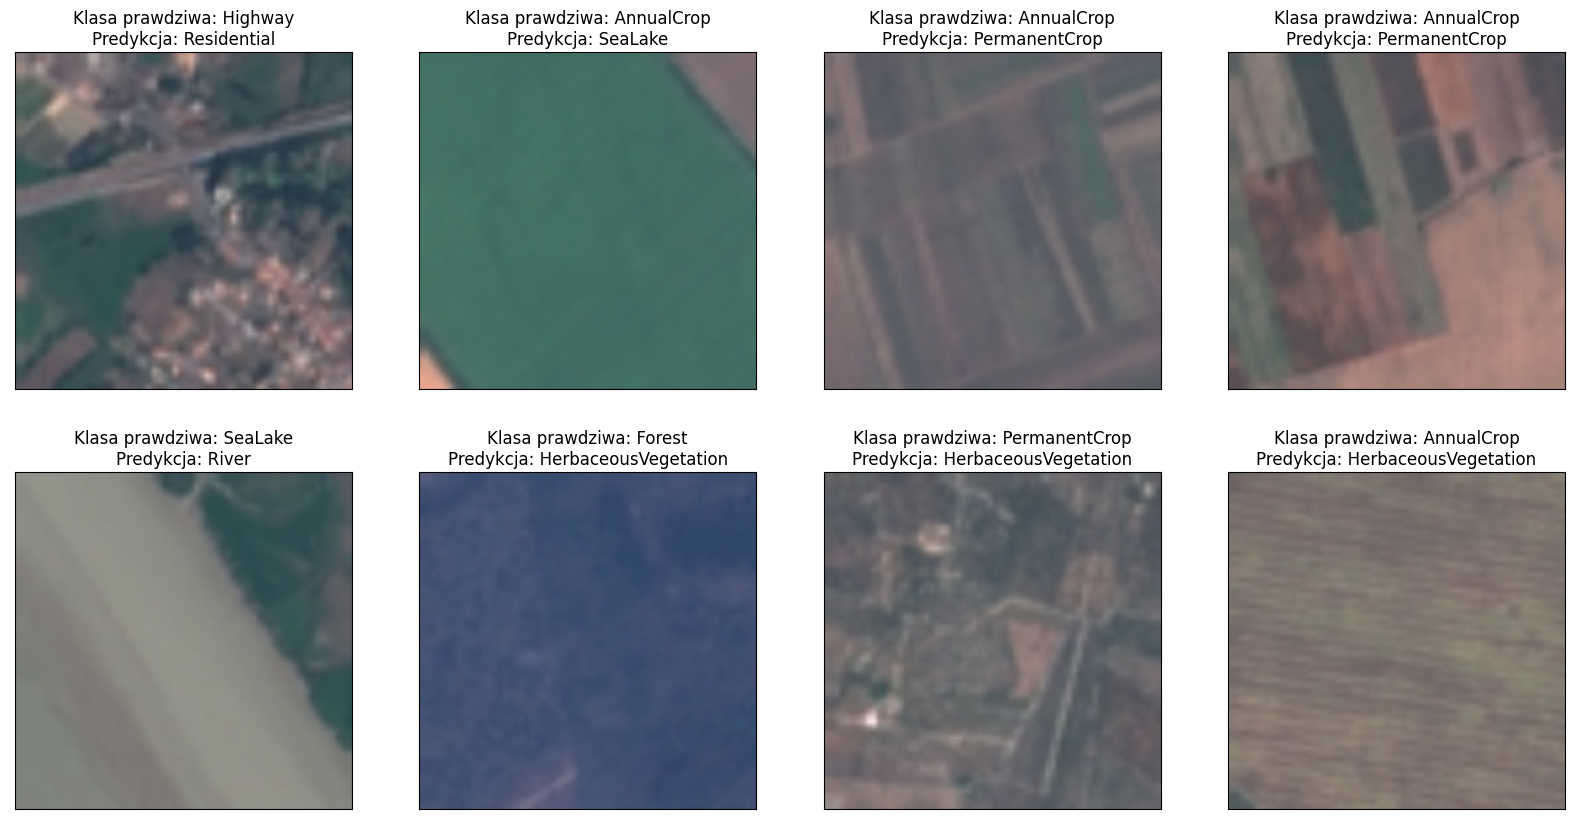

In [125]:
baseline_im = torch.zeros(sil_gen.ds[0][0].shape)
baseline_sl = sil_gen.get_silency_map_input(baseline_im,cam_type=cam_type)
cam_image = show_cam_on_image(torch.transpose(baseline_im.T,1,0).numpy(), baseline_sl, use_rgb=True)
fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)

for nr,i,j,temp in zip([368,362,231,135,103,98,124,0],[0,0,0,0,1,1,1,1],[0,1,2,3,0,1,2,3],lst_false):
    ax[i,j].imshow(torch.transpose((sil_gen.ds[temp[2]][0].T.cpu()+1)/2,1,0).numpy())
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].set_title(f"Klasa prawdziwa: {DS_LABELS[temp[0]]}\nPredykcja: {DS_LABELS[temp[1]]}")